In [36]:
import numpy as np
from tc_utils import *
from scipy.special import erf
import sys, os
from itertools import dropwhile


[0.000264819, -0.0025481, 0.00689859, 0.00333889, 0.0, 0.0, 0.0, 0.0, 0.0] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 0.0
[0.000264819, -0.0025481, 0.00689859, 0.00333889] [] 0.0


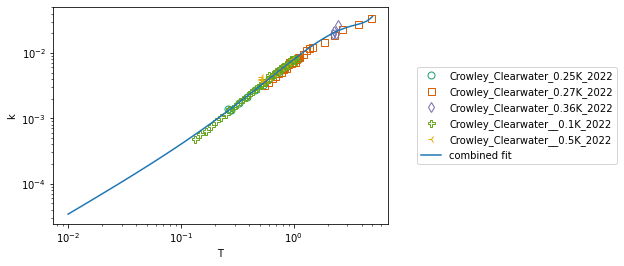

In [37]:
mat = "Clearwater"
tc_file_date = "2024-05-28"


TCdata = np.loadtxt(f"..{os.sep}thermal_conductivity_compilation_{tc_file_date}.csv", dtype=str, delimiter=',') # imports compilation file csv
headers = TCdata[0] # pulls the headers from the file
mat_names = TCdata[:,0] # makes an array of material names

mat_row = TCdata[int(np.argwhere(mat_names == mat))] # searches material name array for mat specified above and return relevant row
num_hi = sum(1 for c in headers[4:] if c.isupper()) # searches for the number of low parameters (by lower case letter)
num_low = sum(1 for c in headers[4:-1] if c.islower()) # searches for number of high parameters
fit_params = mat_row 
fit_params = np.char.replace(fit_params, "^", "0")
# fit_range, low_param, hi_param, erf_param = np.array(mat_row[2:4], dtype=float), np.array(fit_params[:num_low], dtype=float), np.array(fit_params[num_low:-1], dtype=float), float(fit_params[-1])

fit_range = np.array(mat_row[2:4], dtype=float) # pulls the fit range

# loop through headers and if lower case add to low_param vice versa
low_param = []
hi_param = []
for key in headers[4:]:
    if key.islower() and key != "erf param":
        low_param.append(float(fit_params[int(np.argwhere(headers == key))]))
    elif key.isupper():
        hi_param.append(float(fit_params[int(np.argwhere(headers == key))]))
    elif key == "erf param":
        erf_param = float(fit_params[int(np.argwhere(headers == key))])

# now we have a list of lower and upper parameters but, they might have trailing 0s if they have fewer parameters than other materials
# so now we remove those trailing 0s
def remove_trailing_zeros(arr):
    return list(dropwhile(lambda x: x == 0, arr[::-1]))[::-1]
print(low_param, hi_param, erf_param)
low_param = remove_trailing_zeros(low_param)
hi_param = remove_trailing_zeros(hi_param)


# now lets plot
T = np.logspace(np.log10(fit_range[0]),np.log10(fit_range[1]),100)


x_range     = np.logspace(np.log10(.01),np.log10(5),100)
y_pred = loglog_func(x_range, low_param[:4], hi_param[:4], erf_param)

print(low_param, hi_param, erf_param)
big_data, data_dict = parse_raw(mat, f"lib\{mat}\RAW", plots=False)
plot_datapoints(data_dict)
plt.plot(x_range, y_pred, label='combined fit')
plt.semilogx()
plt.semilogy()
plt.ylabel("k")
plt.xlabel("T")
plt.legend(loc="center right", bbox_to_anchor=(1.7, 0.5))
plt.show()



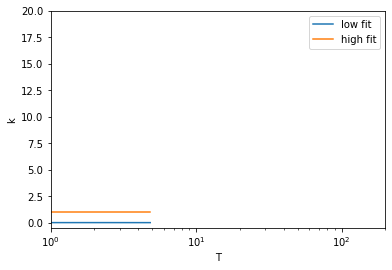

In [38]:

low_fit = T*np.polyval(low_param, T)
hi_fit = 10**np.polyval(hi_param, np.log10(T))

plt.figure()
# plt.plot(xs, loglog_func(xs, low_param, hi_param, erf_param)/xs, label='combined fit')
plt.plot(xs, low_fit/xs, label='low fit')
plt.plot(xs, hi_fit, label='high fit')

plt.semilogx()
plt.ylabel("k")
plt.xlabel("T")
plt.xlim((1, 200))
plt.ylim((-0.5, 20))

plt.legend()
plt.show()